# sample of WC display from XSF file


## imports some library

In [ ]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## define display function

In [2]:
def displayWC(file_path,swathNumber,filename,comment):
    with nc.Dataset(file_path) as dataset:
        reflectivity_count= dataset['/sounder/water_column/rx_info/sample_count']
        reflectivity_offset= dataset['/sounder/water_column/rx_info/sample_offset']
        sample_amplitude = dataset['/sounder/water_column/rx_info/sample_amplitude']
        tvg_offset = dataset['/sounder/water_column/rx_info/tvg_offset']
        numOfPings = int(dataset["/sounder"].dimensions["swath_dim"].size)
        numOfBeams = dataset["/sounder/water_column/rx_info/num_beams"]

        #initialize ping (with nans)\n",
        max_samples = max(reflectivity_count[swathNumber])
        #fill ping with data\n",
        beamCount=int(numOfBeams[swathNumber][0])
        ping = np.zeros((beamCount, max_samples))
        ping.fill(float(np.nan))
        for bnr in range(beamCount):
            off=tvg_offset[swathNumber][0] #retrieve TVG offset set by kongberg
            ping[bnr][:reflectivity_count[swathNumber][bnr]] = sample_amplitude[reflectivity_offset[swathNumber][bnr]:reflectivity_offset[swathNumber][bnr] + reflectivity_count[swathNumber][bnr]]/2 -off #O.5 db encoding

        x= ping.reshape(beamCount*max_samples)
        x = x[~np.isnan(x)] #remove nan

        fig, axarr = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
        #plot the ping
        plt.rcParams['figure.dpi'] = 170
        im=axarr[0].imshow(ping.transpose(),aspect=0.2,cmap=plt.get_cmap("jet"));
        fig.colorbar(im,ax=axarr[0])

        axarr[1].hist(x, 256,density=True,orientation='horizontal')
        #axarr[1].set_title('values Histogram')
        axarr[1].set_xlabel("value")
        axarr[1].set_ylabel("density")
        fig.tight_layout()
        #fig.suptitle(filename + " " + comment)
        plt.grid(True)

        #plt.show()
        print(filename + " " + comment)
        print("Statistiques : min ",x.min(),", max ",x.max(),", mean",x.mean()," std ",x.std())


In [3]:
base_path="F://ESSTECH17//KMALL//Mariadzek2000//"

## set the files paths and swath id

0031_20180905_191352.xsf deeper single swath
Statistiques : min  -94.0 , max  31.0 , mean -45.63648979812887  std  19.356888942863886


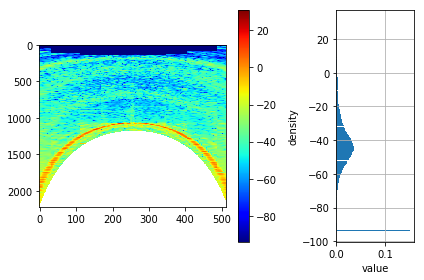

In [4]:
filename="0031_20180905_191352.xsf"
comment="deeper single swath"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0040_20180905_223042.xsf deep single swath
Statistiques : min  -94.0 , max  32.5 , mean -45.85110158641523  std  17.851721858692045


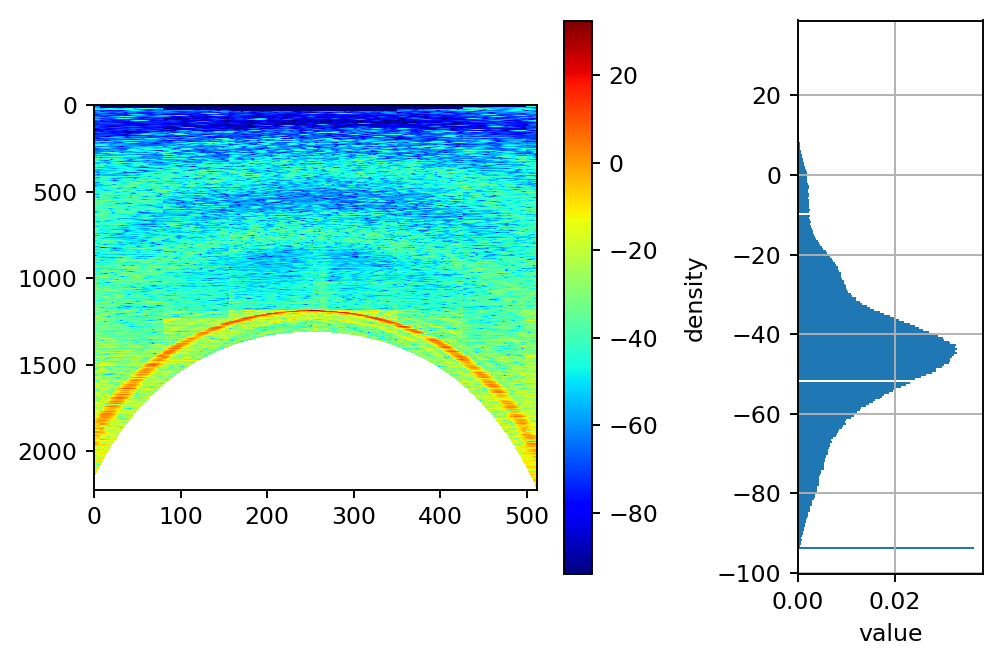

In [5]:

filename="0040_20180905_223042.xsf"
comment="deep single swath"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0044_20180906_000647.xsf deep dual swath
Statistiques : min  -94.0 , max  29.5 , mean -44.602485330385235  std  18.72945413529379


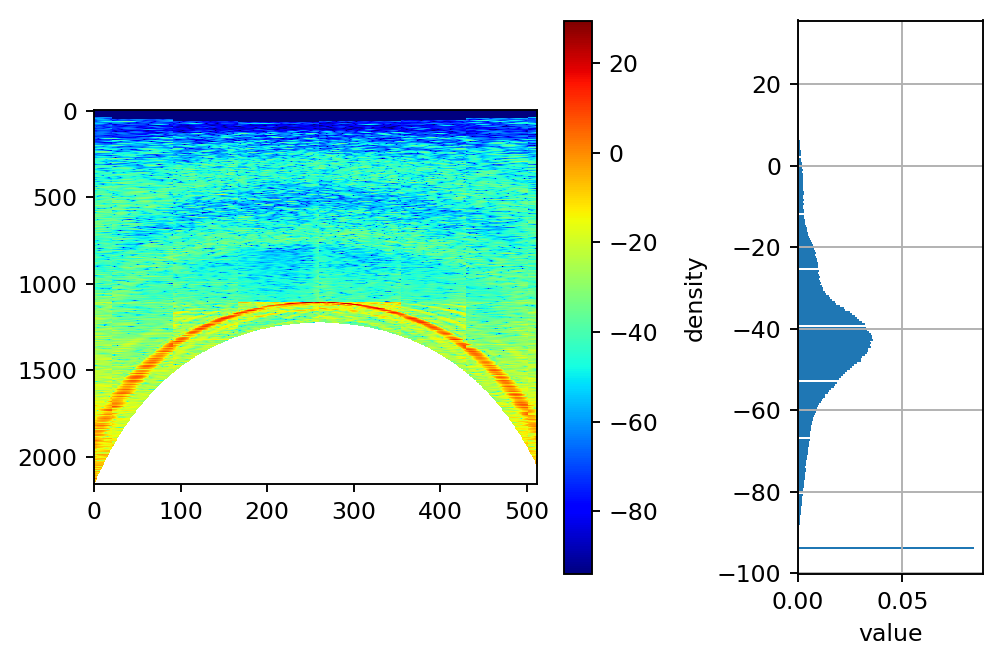

In [6]:
filename="0044_20180906_000647.xsf"
comment="deep dual swath"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0048_20180906_015155.xsf deeper dual swath
Statistiques : min  -94.0 , max  31.0 , mean -45.18525772391045  std  20.47554697383444


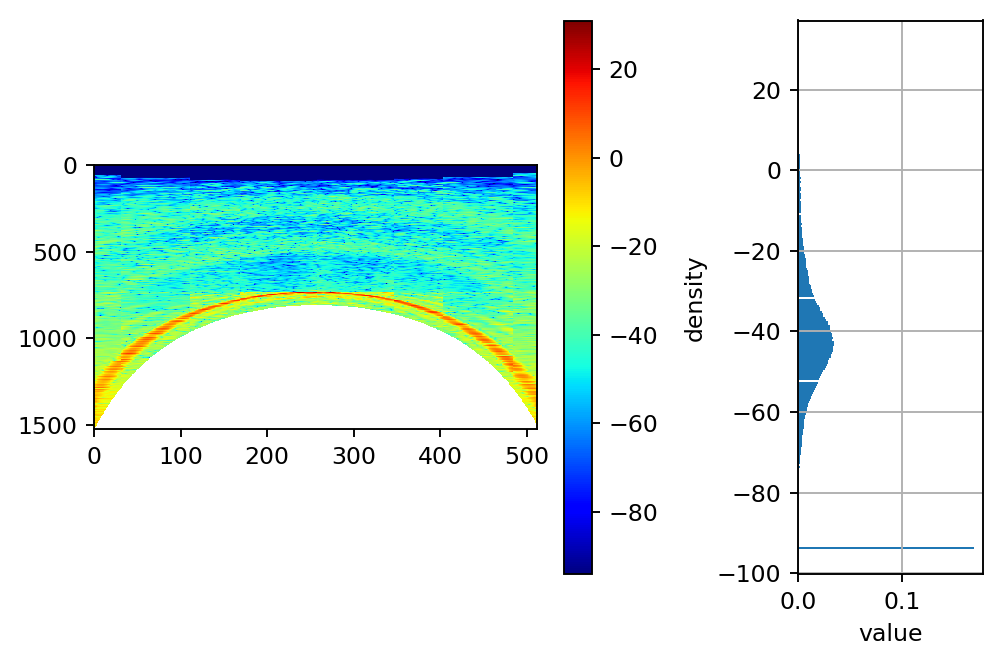

In [7]:
filename="0048_20180906_015155.xsf"
comment="deeper dual swath"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0055_20180906_031937.xsf deep single swath 18deg
Statistiques : min  -94.0 , max  31.0 , mean -51.52957075825715  std  16.591259889849088


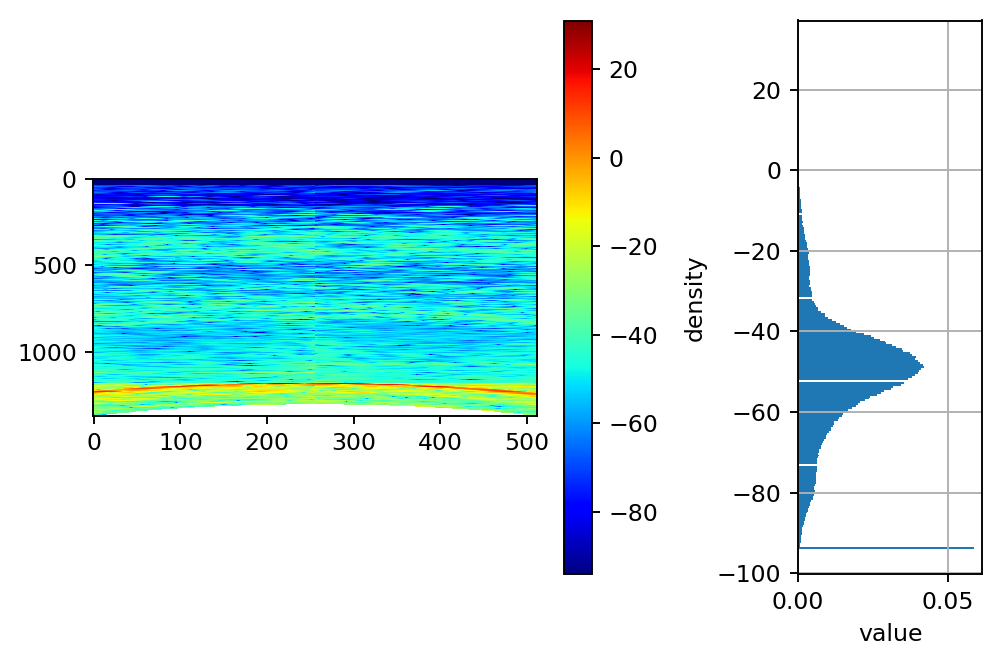

In [8]:

filename="0055_20180906_031937.xsf"
comment="deep single swath 18deg"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0056_20180906_033446.xsf deep single swath 35deg
Statistiques : min  -94.0 , max  28.5 , mean -49.5261073731427  std  16.68510016318328


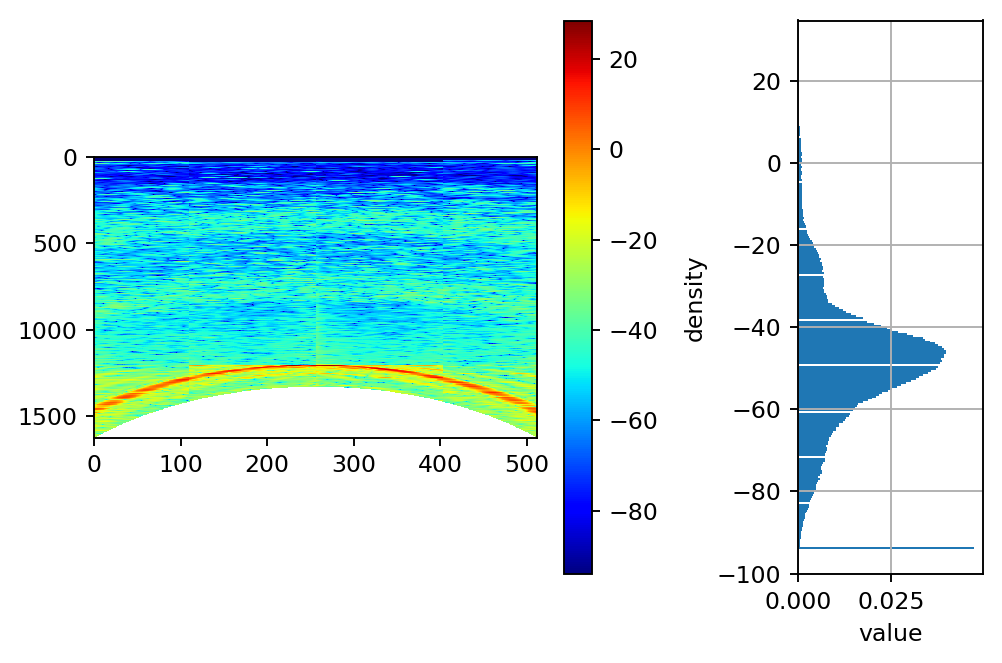

In [9]:
filename="0056_20180906_033446.xsf"
comment="deep single swath 35deg"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)


0057_20180906_034648.xsf deep single swath 60deg
Statistiques : min  -94.0 , max  33.5 , mean -48.956984552934124  std  17.123954464343242


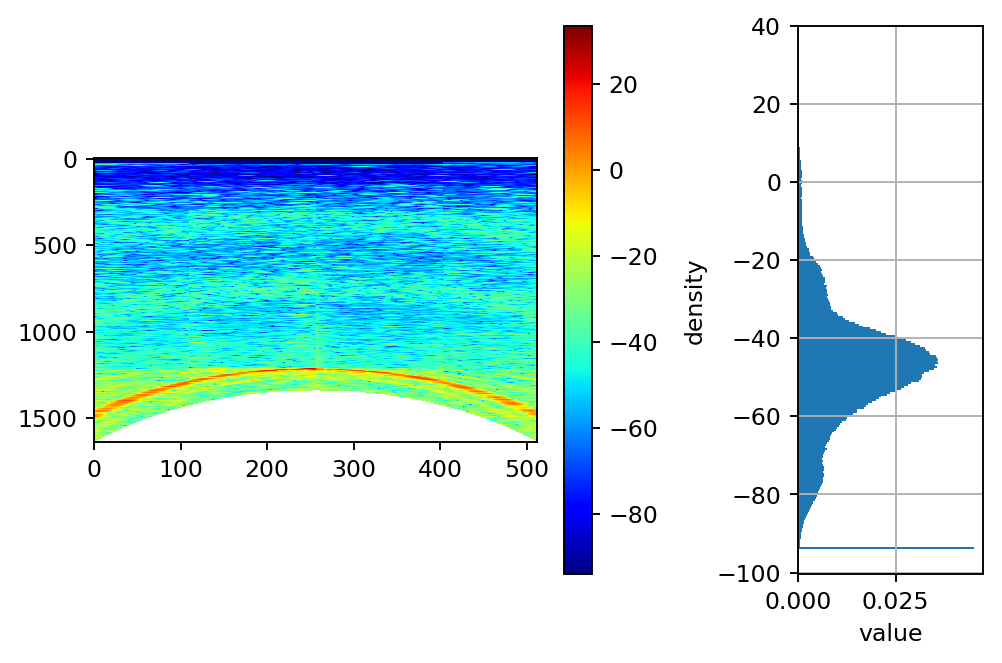

In [10]:
filename="0057_20180906_034648.xsf"
comment="deep single swath 60deg"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0050_20180906_023416.xsf deeper 60deg
Statistiques : min  -94.0 , max  32.5 , mean -45.24007917120774  std  19.739663617325174


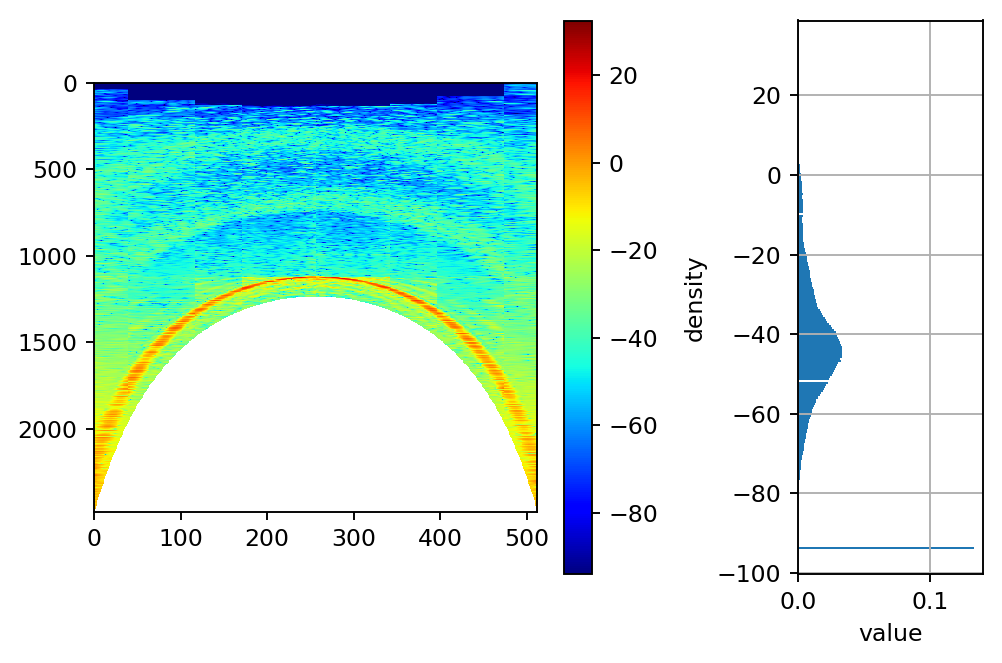

In [11]:
filename="0050_20180906_023416.xsf"
comment="deeper 60deg"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)


0052_20180906_024901.xsf deeper 35deg
Statistiques : min  -94.0 , max  31.5 , mean -50.35796521986813  std  19.50301979630148


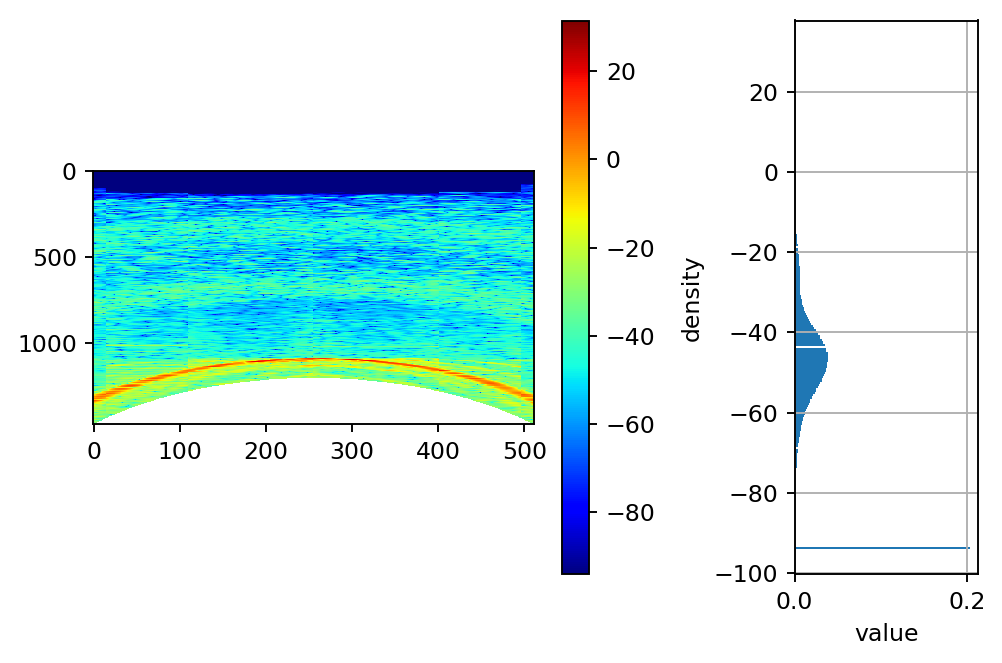

In [12]:
filename="0052_20180906_024901.xsf"
comment="deeper 35deg"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0063_20180906_050710.xsf very deep CW
Statistiques : min  -94.0 , max  33.5 , mean -46.43143468410428  std  16.27993778346209


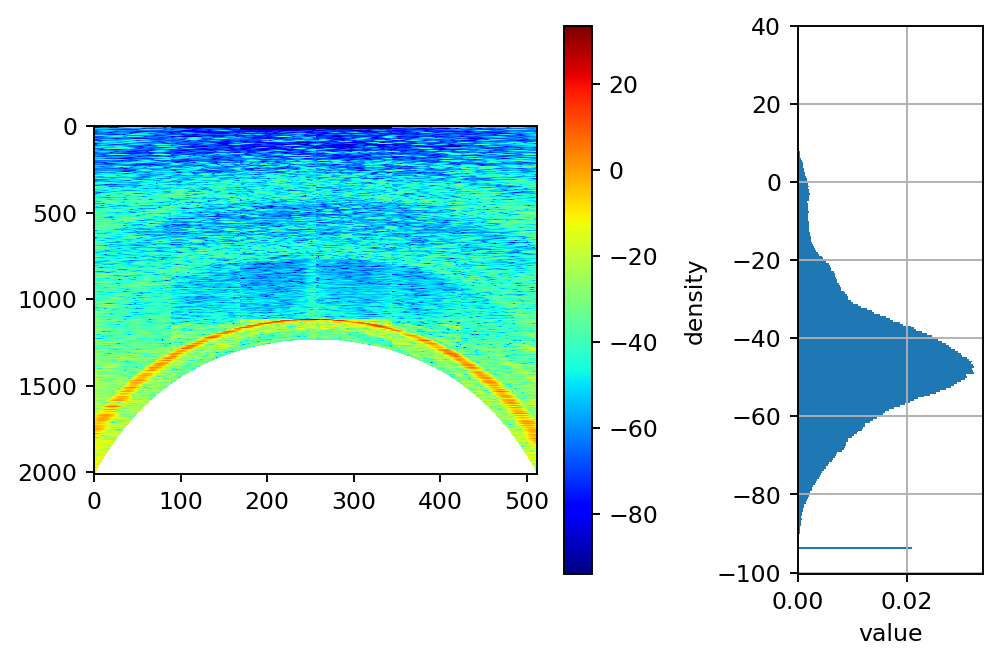

In [13]:

filename="0063_20180906_050710.xsf"
comment="very deep CW"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0064_20180906_052550.xsf very deep FM
Statistiques : min  -94.0 , max  30.0 , mean -45.83536144609982  std  16.085834243829463


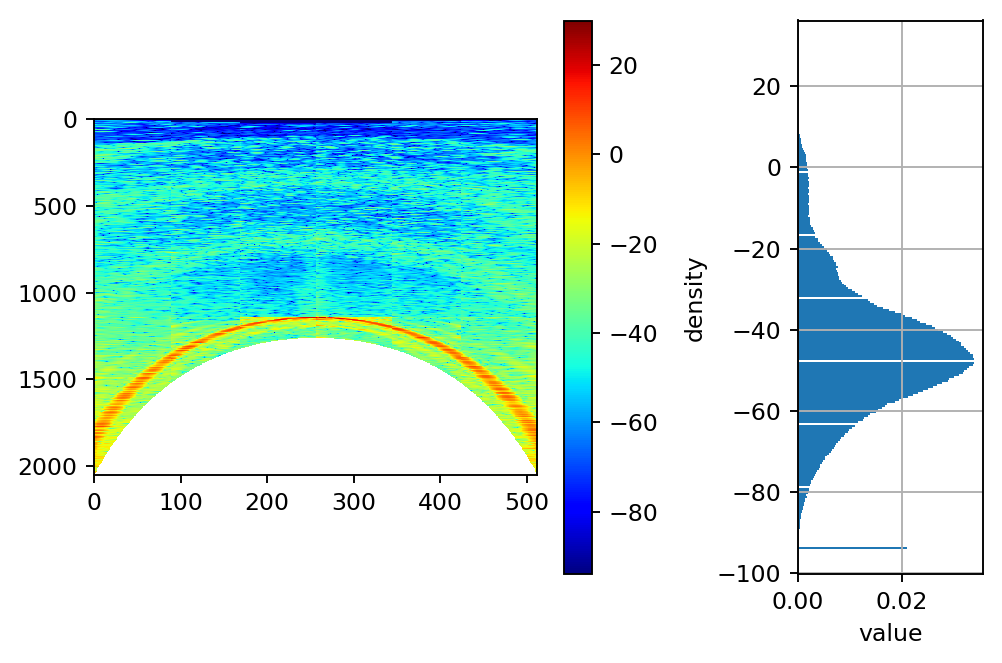

In [14]:
filename="0064_20180906_052550.xsf"
comment="very deep FM"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0065_20180906_054946.xsf extra deep CW
Statistiques : min  -94.0 , max  30.5 , mean -45.425103417340885  std  16.23207359485933


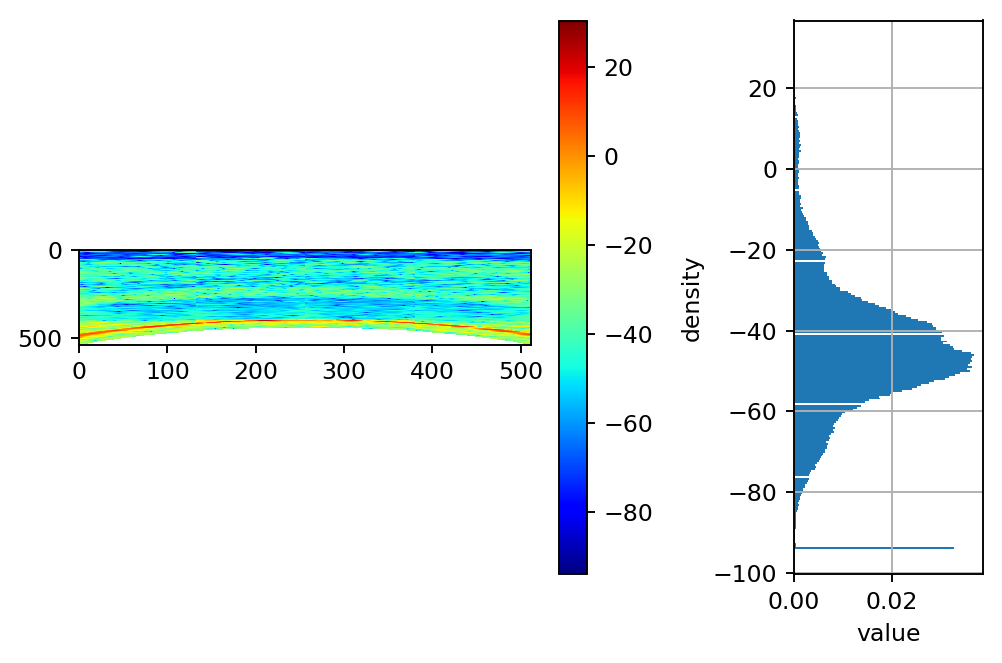

In [15]:
filename="0065_20180906_054946.xsf"
comment="extra deep CW"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)


0069_20180906_070047.xsf extra deep FM
Statistiques : min  -94.0 , max  33.5 , mean -44.49752041757791  std  15.49719116567918


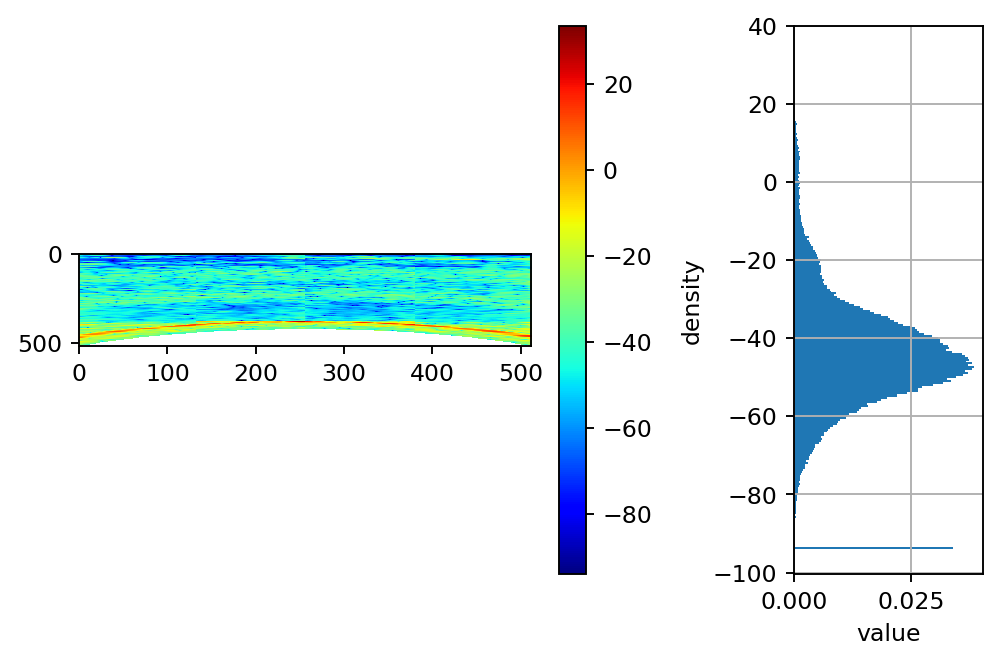

In [16]:
filename="0069_20180906_070047.xsf"
comment="extra deep FM"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)


0074_20180906_085600.xsf extreme deep CW
Statistiques : min  -94.0 , max  33.0 , mean -46.50840466628093  std  15.752743631055063


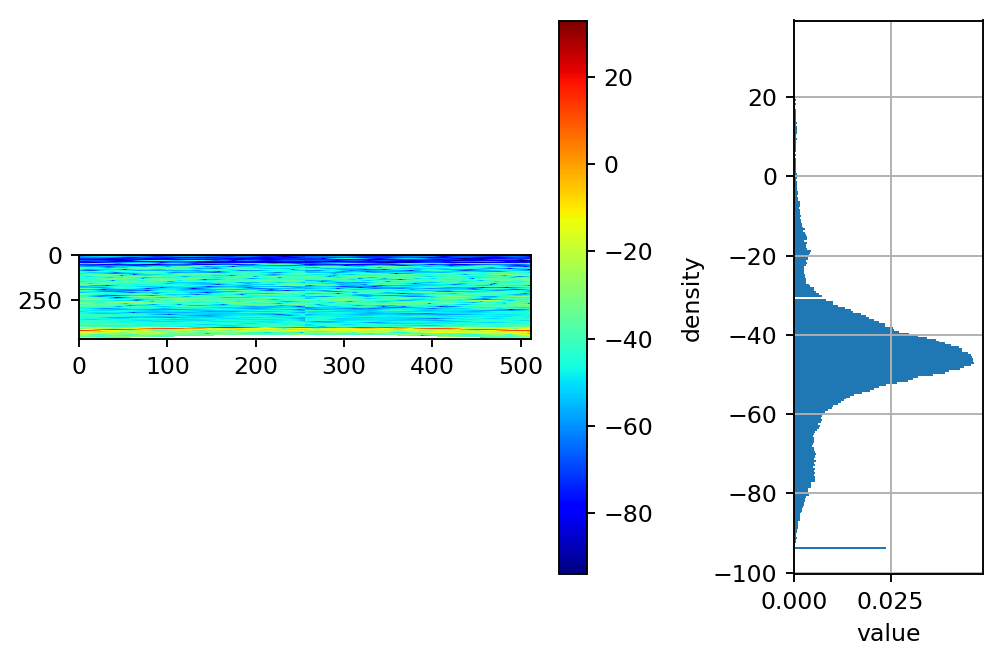

In [17]:
filename="0074_20180906_085600.xsf"
comment="extreme deep CW"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)

0075_20180906_091850.xsf extreme deep CW
Statistiques : min  -94.0 , max  33.5 , mean -43.33467318025565  std  14.239616446006314


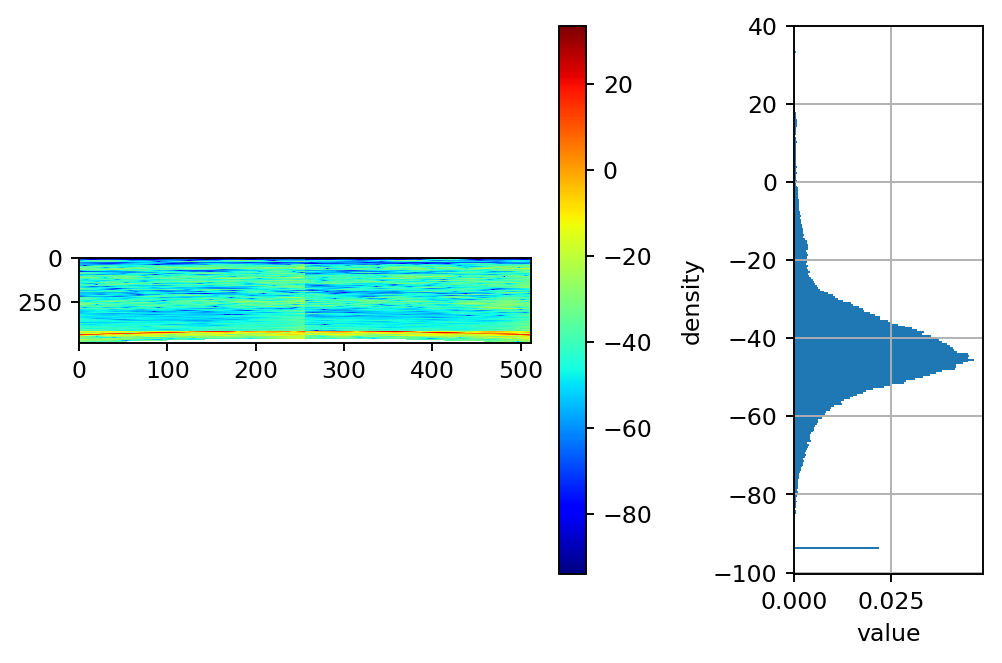

In [18]:
filename="0075_20180906_091850.xsf"
comment="extreme deep CW"
file_path= base_path + filename
swathNumber=0
displayWC(file_path,0,filename,comment)